In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


[[[[0.03258145 0.02255639 0.01503759]
   [0.03258145 0.02255639 0.01503759]
   [0.03258145 0.02255639 0.01503759]
   ...
   [0.04260652 0.03258145 0.02506266]
   [0.04260652 0.03258145 0.02506266]
   [0.04260652 0.03258145 0.02506266]]

  [[0.03258145 0.02255639 0.01503759]
   [0.03258145 0.02255639 0.01503759]
   [0.03258145 0.02255639 0.01503759]
   ...
   [0.04260652 0.03258145 0.02506266]
   [0.04260652 0.03258145 0.02506266]
   [0.04260652 0.03258145 0.02506266]]

  [[0.03258145 0.02255639 0.01503759]
   [0.03258145 0.02255639 0.01503759]
   [0.03258145 0.02255639 0.01503759]
   ...
   [0.04260652 0.03258145 0.02506266]
   [0.04260652 0.03258145 0.02506266]
   [0.04260652 0.03258145 0.02506266]]

  ...

  [[0.04761905 0.04010025 0.04010025]
   [0.05012531 0.04260652 0.04010025]
   [0.04260652 0.03508772 0.03258145]
   ...
   [0.3809524  0.3784461  0.39849624]
   [0.3709273  0.36842105 0.3884712 ]
   [0.358396   0.35588974 0.37593985]]

  [[0.04260652 0.03759398 0.04010025]
   [0.0

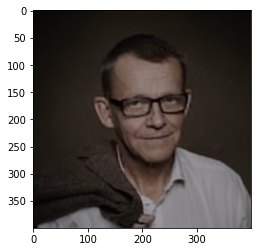

In [5]:
import time
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import random
import tensorflow as tf
random.seed(2)
tf.random.set_seed(4)


start = time.time()
SIZE= 400  #Limiting to 480 size image as my laptop cannot handle larger images. 
img_data=[]

path = '/content/drive/My Drive/Untitled folder/HansRosling.jpg'

img=cv2.imread(path, 1)   #Change 1 to 0 for Grey scale images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))


img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 399.
print(img_array)

plt.imshow(img)

#Define Autoencoder model. 
#Encoder
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((1, 1), padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 #Decoder   
model.add(UpSampling2D((1, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

model.fit(img_array, img_array,
        epochs=1000,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch

print("Output")


pred = model.predict(img_array)   #Predict model on the same input array.

#In reality, train on 1000s of input images and predict on images that the training 
#algorithm never saw. 

imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

img2 = Image.fromarray(pred[0], 'RGB')
pred = model.predict(img_array)   #Predict model on the same input array.

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

print(mse(pred, img_array))

end = time.time()
time_n = end - start
print(time_n)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[0.08724832 0.06040268 0.04026846]
  [0.09395973 0.06711409 0.04697987]
  [0.10067114 0.0738255  0.05369128]
  ...
  [0.11409396 0.08724832 0.06711409]
  [0.11409396 0.08724832 0.06711409]
  [0.11409396 0.08724832 0.06711409]]

 [[0.08724832 0.06040268 0.04026846]
  [0.09395973 0.06711409 0.04697987]
  [0.10067114 0.0738255  0.05369128]
  ...
  [0.12080537 0.09395973 0.0738255 ]
  [0.12080537 0.09395973 0.0738255 ]
  [0.12080537 0.09395973 0.0738255 ]]

 [[0.10067114 0.06711409 0.05369128]
  [0.10067114 0.0738255  0.05369128]
  [0.10067114 0.0738255  0.05369128]
  ...
  [0.12751678 0.10738255 0.0738255 ]
  [0.12751678 0.10738255 0.0738255 ]
  [0.11409396 0.09395973 0.06040268]]

 ...

 [[0.22147651 0.19463087 0.18791946]
  [0.13422819 0.10738255 0.08724832]
  [0.16107383 0.13422819 0.12080537]
  ...
  [0.97986577 0.97315436 1.02684564]
  [1.02684564 1.02013423 1.0738255 ]
  [0.99328859 0.98657718 1.04026846]]

 [[0.16107383 0.13422819 0.12080537]
  [0.14765101 0.12080537 0.10067114]


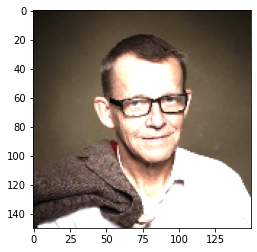

In [63]:
import numpy
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers  
import numpy
import matplotlib.pyplot

start = time.time()
im=cv2.imread(path, 1)   #Change 1 to 0 for Grey scale images
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #Changing BGR to RGB to show images in true colors
im=cv2.resize(im,(SIZE, SIZE))
img_array = numpy.array(im)/149
print(img_array)
img_array.shape
plt.imshow(img_array)


# compress the matrix of a single channel
def compressSingleChannel(channelDataMatrix, singularValuesLimit):
    uChannel, sChannel, vhChannel = numpy.linalg.svd(channelDataMatrix)
    aChannelCompressed = numpy.zeros((channelDataMatrix.shape[0], channelDataMatrix.shape[1]))
    k = singularValuesLimit

    leftSide = numpy.matmul(uChannel[:, 0:k], numpy.diag(sChannel)[0:k, 0:k])
    aChannelCompressedInner = numpy.matmul(leftSide, vhChannel[0:k, :])
    aChannelCompressed = aChannelCompressedInner.astype('uint8')
    return aChannelCompressed

SIZE= 400  #Limiting to 480 size image as my laptop cannot handle larger images. 
path = '/content/drive/My Drive/Untitled folder/HansRosling.jpg'

a=cv2.imread(path, 1)   #Change 1 to 0 for Grey scale images
img = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
a=cv2.resize(a,(SIZE, SIZE))
a_np = np.array(a)/399
aRed = a_np[:,:,0]
aGreen = a_np[:,:,1]
aBlue = a_np[:,:,2]

# image width and height:
imageWidth = 400
imageHeight = 400

# number of singular values to use for reconstructing the compressed image
singularValuesLimit = 100


aRedCompressed = compressSingleChannel(aRed, singularValuesLimit)
aGreenCompressed = compressSingleChannel(aGreen, singularValuesLimit)
aBlueCompressed = compressSingleChannel(aBlue, singularValuesLimit)

imr = Image.fromarray(aRedCompressed, mode=None)
img = Image.fromarray(aGreenCompressed, mode=None)
imb = Image.fromarray(aBlueCompressed, mode=None)

newImage = Image.merge("RGB", (imr, img, imb))
P = numpy.asarray(newImage)
print(mse(P,a_np))
end = time.time()
time_n = end - start
print(time_n)